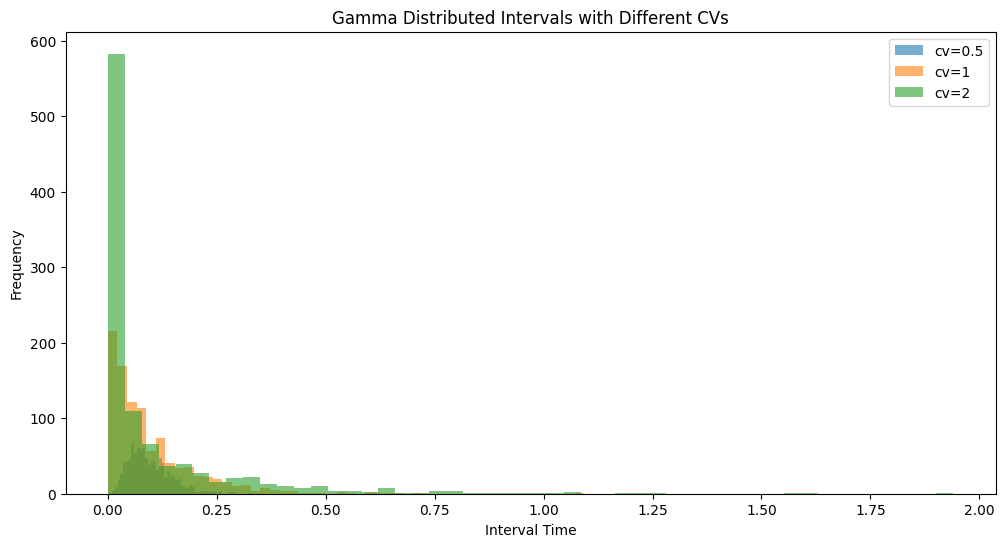

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_intervals(cv, req_rate, total_req):
    shape = 1 / (cv * cv)
    scale = cv * cv / req_rate
    intervals = np.random.gamma(shape, scale, total_req)
    return intervals

# 参数
req_rate = 10  # 平均每秒请求数
total_req = 1000  # 总请求数量

# 不同 cv 值模拟
cvs = [0.5, 1, 2]
plt.figure(figsize=(12, 6))
for cv in cvs:
    intervals = simulate_intervals(cv, req_rate, total_req)
    plt.hist(intervals, bins=50, alpha=0.6, label=f'cv={cv}')

plt.xlabel("Interval Time")
plt.ylabel("Frequency")
plt.title("Gamma Distributed Intervals with Different CVs")
plt.legend()
plt.show()


In [17]:
import numpy as np

# 参数
alpha = 0.1  # 幂律分布形状参数
values = [8, 2046]  # 可能的取值
tot_req = 1000  # 总样本数

# 计算权重并归一化
weights = np.array([v**-alpha for v in values])
probabilities = weights / weights.sum()

# 按权重采样
samples = np.random.choice(values, size=tot_req, p=probabilities)

# 输出结果
print("生成的值分布：")
print(f"8 的数量: {np.sum(samples == 8)}")
print(f"2046 的数量: {np.sum(samples == 2046)}")

生成的值分布：
8 的数量: 614
2046 的数量: 386


In [49]:
import numpy as np

# alpha = 1  # Adjust alpha to control the distribution => 2048少
# alpha = 0.01  # Adjust alpha to control the distribution => 趋近平均
def generate_values(alpha):
    # Define the possible values
    values = np.array([8, 2048], dtype=float)
    print(values)
    
    # Compute weights using the power-law distribution
    weights = values ** (-alpha)
    print(weights)
    
    # Normalize the weights to get probabilities
    probabilities = weights / weights.sum()
    print(probabilities)
    
    # Generate 32 values based on the computed probabilities
    result = np.random.choice(values, size=32, p=probabilities)
    return result

# Example usage:
alpha = 0.2
values_generated = generate_values(alpha)
print(values_generated)


[   8. 2048.]
[0.65975396 0.21763764]
[0.75194925 0.24805075]
[2048.    8. 2048. 2048.    8.    8.    8. 2048.    8.    8.    8.    8.
 2048.    8. 2048. 2048.    8. 2048.    8. 2048. 2048.    8.    8.    8.
    8.    8.    8. 2048.    8.    8.    8.    8.]


In [55]:
import random
def generate_average_distribution(alpha, num1, num2, N):
    distribution = []
    num1Cnt = 0
    num2Cnt = 0
    for _ in range(N):
        if random.random() < alpha:
            distribution.append(num1)
            num1Cnt += 1
        else:
            distribution.append(num2)
            num2Cnt += 1
    print(f"num1: {num1Cnt}, num2: {num2Cnt}")        
    return distribution


print(generate_average_distribution(0.5, 8, 2048, 32))
print(generate_average_distribution(0.8, 8, 2048, 32))


num1: 16, num2: 16
[2048, 8, 2048, 8, 8, 8, 8, 2048, 8, 2048, 8, 2048, 8, 2048, 2048, 2048, 8, 2048, 2048, 2048, 8, 2048, 8, 8, 2048, 8, 2048, 2048, 2048, 8, 8, 8]
num1: 26, num2: 6
[2048, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2048, 8, 8, 8, 8, 2048, 8, 8, 8, 8, 8, 2048, 8, 2048, 2048]
